# Predictive Modeling

In [1]:
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import datetime
import pprint

In [2]:
path = "/Users/jasonzhou/Documents/GitHub/Portfolio/SpringBoard/Exercises/ultimate_challenge"
os.chdir(path)

df = pd.read_json("ultimate_data_challenge.json")

In [3]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


# Data Cleaning

In [4]:
# Checking for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
# We're just going to go ahead and fill null rating values with their respective means

meanofrating = df['avg_rating_of_driver'].mean()
meanbyrating = df['avg_rating_by_driver'].mean()

df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(meanofrating)
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(meanbyrating)

In [6]:
# See what the current distribution of phone is between iPhones and Androids

df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [7]:
# Helper function that randomly returns "Android" or "iPhone" based on weighted probabilities

import random

def randomphone():
    roll = random.random()
    if roll > 0.7:
        return "Android"
    else:
        return "iPhone"

In [8]:
# Seems like the ratio is essentially 35/15, or 70/30 iPhones to Androids. We'll randomly fill in the missing phone
# values according to these proportions

df['phone'] = df['phone'].fillna(randomphone())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


# Data Visualization

In [10]:
# Our focus of this project is to examine user retention, and two columns help with that: signup_date and 
# last_trip_date. We should create a new column that directly tells us the time difference between these two dates

df['signup_date'][0][8:]

'25'

In [11]:
# Seeing the range of dates we have in the data

df['signup_date'].value_counts()

2014-01-18    2948
2014-01-25    2885
2014-01-11    2402
2014-01-24    2284
2014-01-17    2149
2014-01-31    2100
2014-01-19    2028
2014-01-10    2021
2014-01-06    1763
2014-01-01    1737
2014-01-26    1708
2014-01-23    1606
2014-01-07    1486
2014-01-04    1485
2014-01-30    1471
2014-01-09    1433
2014-01-16    1431
2014-01-22    1369
2014-01-05    1343
2014-01-12    1334
2014-01-20    1295
2014-01-28    1284
2014-01-08    1275
2014-01-27    1236
2014-01-21    1234
2014-01-03    1213
2014-01-29    1197
2014-01-14    1120
2014-01-15    1110
2014-01-13    1049
2014-01-02    1004
Name: signup_date, dtype: int64

In [12]:
df['last_trip_date'].sort_values()

31425    2014-01-01
10729    2014-01-01
40336    2014-01-01
34828    2014-01-01
37295    2014-01-01
            ...    
45126    2014-07-01
38651    2014-07-01
14473    2014-07-01
22735    2014-07-01
45357    2014-07-01
Name: last_trip_date, Length: 50000, dtype: object

In [13]:
# Helper function that determines difference in time between signup date and date of last trip. We're only really 
# interested in the month difference as a general measure

def monthsApart(string1, string2):
    year1 = int(string1[0:4])
    month1 = int(string1[5:7])
    day1 = int(string1[8:])
    
    year2 = int(string2[0:4])
    month2 = int(string2[5:7])
    day2 = int(string2[8:])
    
    date1 = datetime.datetime(year1, month1, day1)
    date2 = datetime.datetime(year2, month2, day2)
    
    difference = date2 - date1
    
    return difference.days / 30

In [14]:
def daysApart(string1, string2):
    year1 = int(string1[0:4])
    month1 = int(string1[5:7])
    day1 = int(string1[8:])
    
    year2 = int(string2[0:4])
    month2 = int(string2[5:7])
    day2 = int(string2[8:])
    
    date1 = datetime.datetime(year1, month1, day1)
    date2 = datetime.datetime(year2, month2, day2)
    
    difference = date2 - date1
    
    return difference.days

Because the data set was collected up until July 1st, any users who booked a ride any time in June or exactly on July 1st would be considered an active user according to the provided definition of "active user". We'll define a function that determines this:

In [15]:
def isActive(string):
    month = int(string[5:7])
    if month >= 6:
        return 1
    else:
        return 0

In [16]:
monthsretained = []
daysretained = []
isactive = []

for i in range(len(df)):
    monthsretained.append(monthsApart(df['signup_date'][i], df['last_trip_date'][i]))
    daysretained.append(daysApart(df['signup_date'][i], df['last_trip_date'][i]))
    isactive.append(isActive(df['last_trip_date'][i]))

In [17]:
df['monthsretained'] = monthsretained
df['daysretained'] = daysretained
df['isActive'] = isactive

In [18]:
ubu = []

for i in range(len(df)):
    if df['ultimate_black_user'][i]:
        ubu.append(1)
    else:
        ubu.append(0)

In [19]:
df['ultimate_black_user'] = ubu

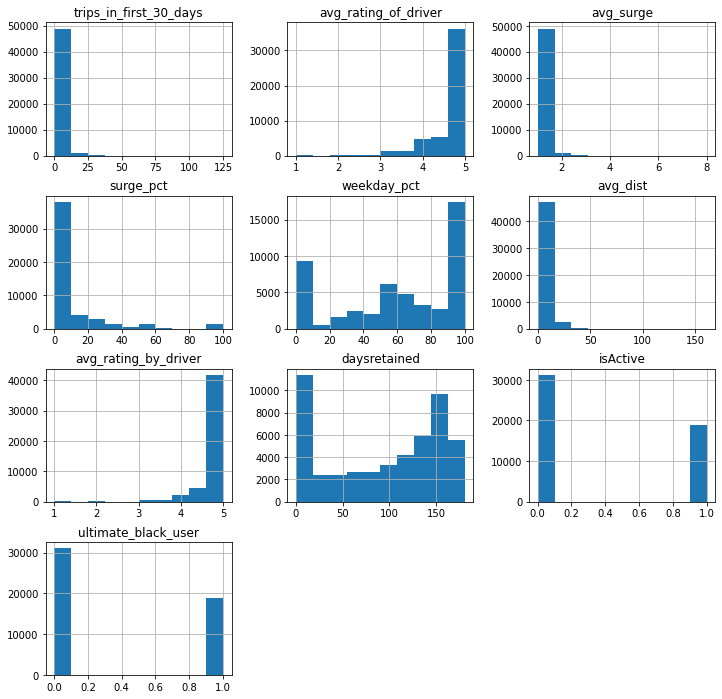

In [20]:
# Plot Histograms

_ = df.hist(column=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
                    'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
                    'daysretained', 'isActive', 'ultimate_black_user'],
            figsize=(12, 12))

1) Most users have 12 or less trips in their first 30 days

2) Most users score their drivers a 4 or 5

3) Most users don't call for a trip if there's a surge going on

4) Essentially the same column as 3)

5) Many users only call for rides almost exclusively during the week or on weekends. 

6) Most users take shorter trips, with a few outliers skewing the shape of the graph

7) Similarly to 2), most drivers score their passengers/users a 4 or 5. 

8) A large amount of users do not use the service for beyond 20 or so days. Interestingly enough, from there there are more users that use the service for a greater amount of time. Until the fall off at around 160 days.

9) More users are "inactive" than active

10) Most users did not take an Ultimate Black in their first 30 days

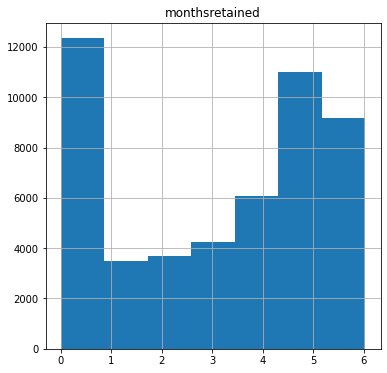

In [21]:
# Getting a separate histogram for monthsretained so we can assign an accurate binsize

_ = df.hist(column='monthsretained', bins=7, figsize=(6, 6))

About 20% of users do not continue to use the service for more than a month, with around 35% of users using the service for 5 months. Very very few users use the service for exactly 6 months. 

We are interesting in determining our retention rate, which is as follows:

In [22]:
(len(df[df['isActive'] == 1]) / len(df)) * 100

37.608000000000004

# Exploratory Data Analysis

We are to build a model that determines if a user will be active on their 6th month since signing up. Conveniently for us, we've already introduced an extra column that tracks this, 'monthsretained'. Based on this, we can assign a binary column that simply tells us if the user's 'monthsretained' is greater than equal to 6. From there we can model this problem as a classification problem. 

In [23]:
# Having used the service on your 6th month means that you've used the service for 5 months

active6 = []

for i in range(len(df)):
    if df['monthsretained'][i] >= 5:
        active6.append(1)
    else:
        active6.append(0)

In [24]:
df['active6'] = active6

Our non-numeric features are 'city', 'signup_date', 'last_trip_date', and 'phone'. 'city' and 'phone' are nominal data features, while the date features are ordinal. 

Now we're going to factorize our non-numeric features so that we can look for any potential correlations there as well.

In [25]:
dates = np.unique(df['last_trip_date'])

In [26]:
signupdatesF = []
lasttripdatesF = []
value1 = 0
value2 = 0

for i in range(len(df)):
    signupdate = df['signup_date'][i]
    lasttripdate = df['last_trip_date'][i]
    
    for j in range(len(dates)):
        if signupdate == dates[j]:
            value1 = j + 1
        if lasttripdate == dates[j]:
            value2 = j + 1
    
    signupdatesF.append(value1)
    lasttripdatesF.append(value2)

In [27]:
cityF = pd.get_dummies(df['city'])
phoneF = pd.get_dummies(df['phone'])

In [28]:
df['signupdatesF'] = signupdatesF
df['lasttripdatesF'] = lasttripdatesF



In [29]:
dfEDA = pd.concat([df, pd.get_dummies(df['city'])], axis=1)
dfEDA = pd.concat([dfEDA, pd.get_dummies(df['phone'])], axis=1)

In [30]:
dfEDA.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,monthsretained,daysretained,isActive,active6,signupdatesF,lasttripdatesF,Astapor,King's Landing,Winterfell,Android,iPhone
trips_in_first_30_days,1.000000,-0.011060,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039097,0.164784,0.164784,0.210463,0.210011,0.012351,0.167633,-0.061075,0.024650,0.037735,-0.059309,0.059309
avg_rating_of_driver,-0.011060,1.000000,-0.021653,-0.003290,-0.001916,0.012587,0.028508,0.101660,-0.015183,-0.015183,-0.010829,-0.007991,0.005995,-0.014434,0.029814,0.082156,-0.094304,0.024206,-0.024206
avg_surge,-0.001841,-0.021653,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010498,-0.016809,-0.016809,-0.003333,0.006780,-0.006944,-0.017906,0.037172,-0.009198,-0.027643,-0.008977,0.008977
surge_pct,0.005720,-0.003290,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.019964,0.004068,0.004068,0.011797,0.017825,0.001667,0.004332,0.045457,0.028221,-0.065603,-0.010150,0.010150
ultimate_black_user,0.112210,-0.001916,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009328,0.165035,0.165035,0.205002,0.163169,-0.007398,0.165084,0.021259,0.039649,-0.051990,-0.075836,0.075836
weekday_pct,0.050388,0.012587,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020366,0.020408,0.020408,0.009693,0.007811,0.007367,0.021589,-0.010540,0.031349,-0.015318,-0.009241,0.009241
avg_dist,-0.136329,0.028508,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079793,-0.109431,-0.109431,-0.092780,-0.092038,0.017274,-0.107710,-0.045431,0.015877,0.030050,0.020888,-0.020888
avg_rating_by_driver,-0.039097,0.101660,0.010498,0.019964,0.009328,0.020366,0.079793,1.000000,-0.032651,-0.032651,-0.026748,-0.021399,0.002197,-0.032556,0.032518,0.084480,-0.098727,0.008765,-0.008765
monthsretained,0.164784,-0.015183,-0.016809,0.004068,0.165035,0.020408,-0.109431,-0.032651,1.000000,1.000000,0.778522,0.650272,-0.117226,0.990029,-0.119001,0.193598,-0.043755,-0.183721,0.183721
daysretained,0.164784,-0.015183,-0.016809,0.004068,0.165035,0.020408,-0.109431,-0.032651,1.000000,1.000000,0.778522,0.650272,-0.117226,0.990029,-0.119001,0.193598,-0.043755,-0.183721,0.183721


Looking at features that correlate the most strongly with 'active6', we have 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'city', 'monthsretained', 'daysretained', and 'last_trip_date'. However we can't use any of 'monthsretained', 'daysretained', and 'last_trip_date' because 'active6' is derived from these columns. 

We'll the remaining features as our features of interest. 

In [31]:
from sklearn.model_selection import train_test_split

X = dfEDA[['trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'Astapor', 'King\'s Landing',
           'Android', 'iPhone']]

y = df['active6']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

# Modeling

In [32]:
from matplotlib.ticker import IndexLocator
import itertools

def plot_cm(y_test,y_pred_class,classes=['NON-default','DEFAULT']):
    # plot confusion matrix
    fig, ax = plt.subplots()
    cm = confusion_matrix(y_test, y_pred_class)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    plt.title("Confusion Matrix")
    ax.set(yticks=[-0.5, 1.5], 
           xticks=[0, 1], 
           yticklabels=classes, 
           xticklabels=classes)
    ax.yaxis.set_major_locator(IndexLocator(base=1, offset=0.5))
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def scores(y_test, y_pred_class):
    # Prints formatted classification metrics. 
    print('Classification Accuracy: ', format(accuracy_score(y_test, y_pred_class), '.3f'))
    print('Precision score: ', format(precision_score(y_test, y_pred_class), '.3f'))
    print('Recall score: ', format(recall_score(y_test, y_pred_class), '.3f'))
    print('F1 score: ', format(f1_score(y_test, y_pred_class), '.3f'))

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

def logiRegr(X_train, y_train, X_test, y_test,**kwargs):
    # Instantiate model. Use kwargs to pass parameters.
    # Pass GridSearch best_params with ** to unpack.
    logreg = LogisticRegression(random_state=1,**kwargs)
    # Fit to training data.
    logreg.fit(X_train, y_train)
    # Examine coefficients
    pprint.pprint(list(zip(X_train.columns,logreg.coef_[0])))
    # Class predictions (not predicted probabilities)
    y_pred_class = logreg.predict(X_test)
    # Scoring metrics
    scores(y_test, y_pred_class)
    # Plot confusion matrix
    plot_cm(y_test,y_pred_class)
    
def randomForest(X_train, y_train, X_test, y_test,**kwargs):
    # Instantiate model. Use kwargs to pass parameters.
    # Pass GridSearch best_params with ** to unpack.
    rf = RandomForestClassifier(random_state=1, **kwargs) 
    # Fit to training data.
    rf.fit(X_train,y_train)
    # Class predictions
    y_pred_class = rf.predict(X_test)
    # Scoring metrics
    scores(y_test, y_pred_class)
    # Confusion matrix
    plot_cm(y_test,y_pred_class)
    
def xgbClass(X_train, y_train, X_test, y_test,**kwargs):
    # Instantiate model. Use kwargs to pass parameters.
    # Pass GridSearch best_params with ** to unpack.
    xg = xgb.XGBClassifier(seed=1,**kwargs)
    # Fit to training data.
    xg.fit(X_train,y_train)
    # Class predictions
    y_pred_class = xg.predict(X_test)
    # Scoring metrics
    scores(y_test, y_pred_class)
    # Confusion matrix
    plot_cm(y_test,y_pred_class)
    
def svmClass(X_train, y_train, X_test, y_test, **kwargs):
    # Instantiate model. Use kwargs to pass parameters.
    # Pass GridSearch best_params with ** to unpack.
    svm = SVC(random_state=1,**kwargs)
    # Fit to training data.
    svm.fit(X_train, y_train)
    # Class predictions
    y_pred_class = svm.predict(X_test)
    # Scoring metrics
    scores(y_test, y_pred_class)
    # Plot confusion matrix
    plot_cm(y_test,y_pred_class)

[('trips_in_first_30_days', 0.1009497940011887),
 ('ultimate_black_user', 0.6967510858681504),
 ('weekday_pct', -8.252160556739418e-05),
 ('avg_dist', -0.04150275894892403),
 ('Astapor', -0.4678815710228727),
 ("King's Landing", 0.7790430231885525),
 ('Android', -1.0471623726859685),
 ('iPhone', -0.07208313316742242)]
Classification Accuracy:  0.764
Precision score:  0.597
Recall score:  0.218
F1 score:  0.320


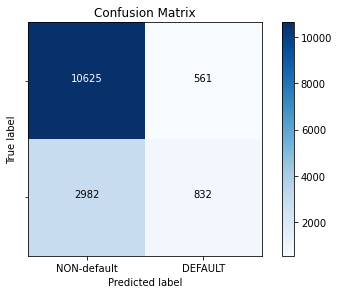

In [42]:
logiRegr(X_train, y_train, X_test, y_test)

Classification Accuracy:  0.733
Precision score:  0.473
Recall score:  0.428
F1 score:  0.449


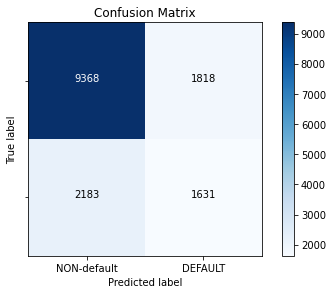

In [43]:
randomForest(X_train, y_train, X_test, y_test)

Classification Accuracy:  0.791
Precision score:  0.629
Recall score:  0.433
F1 score:  0.513


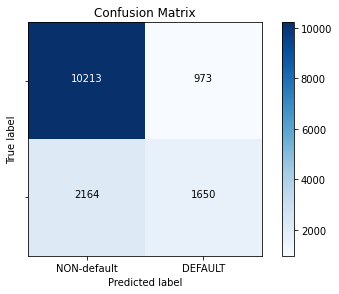

In [44]:
xgbClass(X_train, y_train, X_test, y_test)

Classification Accuracy:  0.750
Precision score:  0.696
Recall score:  0.033
F1 score:  0.063


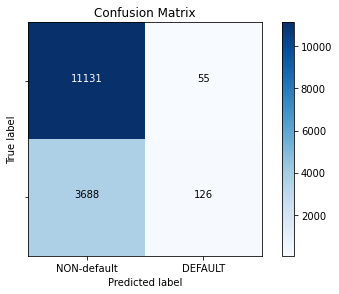

In [45]:
svmClass(X_train, y_train, X_test, y_test)

It seems that the default xgbClass model performs the best compared to the default models of the other classes. Let's do some hyperparameter tuning for each type of algorithm, starting with logistic regression:

In [52]:
# Neccesary Imports

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [62]:
from sklearn.model_selection import RepeatedStratifiedKFold

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [63]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.762114 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762057 (0.004159) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.762114 (0.004192) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762029 (0.004180) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.762057 (0.004159) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.762086 (0.004151) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762038 (0.004185) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.762038 (0.004159) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.762019 (0.004134) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762019 (0.004204) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.761981 (0.004140) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.761990 (0.004083) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.761952 (0.004165) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.761886 (0.003869) with: {

Classification Accuracy:  0.764
Precision score:  0.598
Recall score:  0.219
F1 score:  0.320


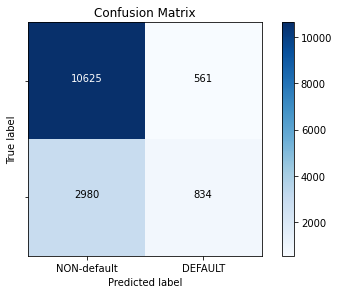

In [64]:
# Based on the best gridsearch, we can identify optimal hyperparameters

logreg = LogisticRegression(random_state=1,
                            penalty='l2',
                            solver='lbfgs',
                            C=100)
logreg.fit(X_train, y_train)

# Class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

# Scoring metrics
scores(y_test, y_pred_class)

# Plot confusion matrix
plot_cm(y_test,y_pred_class)

Incredibly marginal improvment, our precision and recall scores improved by exactly 0.001 while our other scores are unchanged.

Let's now move on to Random Forest:

In [66]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = range(1,8)
grid = dict(n_estimators=n_estimators,max_features=max_features)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [67]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.741286 using {'max_features': 7, 'n_estimators': 1000}
0.733543 (0.005439) with: {'max_features': 1, 'n_estimators': 10}
0.731429 (0.005887) with: {'max_features': 1, 'n_estimators': 100}
0.731514 (0.005548) with: {'max_features': 1, 'n_estimators': 1000}
0.732876 (0.004558) with: {'max_features': 2, 'n_estimators': 10}
0.731371 (0.005775) with: {'max_features': 2, 'n_estimators': 100}
0.731762 (0.005195) with: {'max_features': 2, 'n_estimators': 1000}
0.734771 (0.004983) with: {'max_features': 3, 'n_estimators': 10}
0.732552 (0.005475) with: {'max_features': 3, 'n_estimators': 100}
0.733029 (0.005510) with: {'max_features': 3, 'n_estimators': 1000}
0.735286 (0.006066) with: {'max_features': 4, 'n_estimators': 10}
0.734524 (0.005219) with: {'max_features': 4, 'n_estimators': 100}
0.734638 (0.005798) with: {'max_features': 4, 'n_estimators': 1000}
0.739010 (0.005593) with: {'max_features': 5, 'n_estimators': 10}
0.736933 (0.005819) with: {'max_features': 5, 'n_estimators': 100}


Classification Accuracy:  0.742
Precision score:  0.492
Recall score:  0.453
F1 score:  0.472


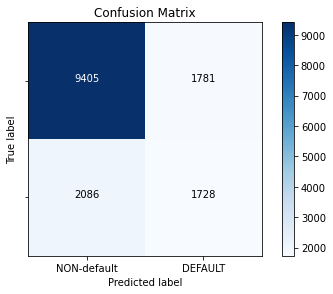

In [68]:
# Based on the best gridsearch, we can identify optimal hyperparameters

ranfor = RandomForestClassifier(n_estimators=1000,
                                max_features=7)
ranfor.fit(X_train, y_train)

# Class predictions (not predicted probabilities)
y_pred_class = ranfor.predict(X_test)

# Scoring metrics
scores(y_test, y_pred_class)

# Plot confusion matrix
plot_cm(y_test,y_pred_class)

In [69]:
model = xgb.XGBClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.792160 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 1.0}
0.747840 (0.004582) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.746307 (0.001799) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.745967 (0.001347) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.756220 (0.006451) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.750407 (0.005801) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.748433 (0.003825) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.764627 (0.002943) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.764633 (0.003051) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.764053 (0.003023) with: {'learning_rate': 0.001, 'm

Classification Accuracy:  0.793
Precision score:  0.640
Recall score:  0.423
F1 score:  0.509


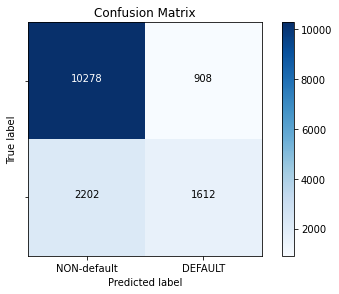

In [73]:
# Based on the best gridsearch, we can identify optimal hyperparameters

xg = xgb.XGBClassifier(learning_rate=0.1,
                       max_depth=3,
                       n_estimators=1000,
                       subsample=1.0)
xg.fit(X_train, y_train)

# Class predictions (not predicted probabilities)
y_pred_class = xg.predict(X_test)

# Scoring metrics
scores(y_test, y_pred_class)

# Plot confusion matrix
plot_cm(y_test,y_pred_class)

In [70]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.766500 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.750447 (0.001430) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.766500 (0.003024) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.548627 (0.006578) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.748740 (0.001388) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.761120 (0.002653) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.550947 (0.005798) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.747567 (0.001221) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.751353 (0.001821) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.562000 (0.005457) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.746213 (0.000691) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.746627 (0.000709) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.682147 (0.030732) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.745733 (0.000140) with: {'C': 0.01, 'gamma': 'scale', 

Classification Accuracy:  0.767
Precision score:  0.652
Recall score:  0.180
F1 score:  0.282


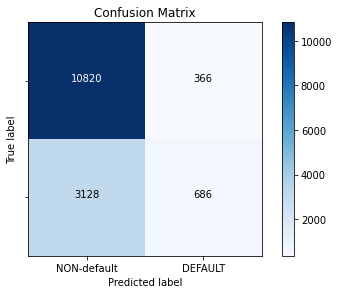

In [74]:
# Based on the best gridsearch, we can identify optimal hyperparameters

svm = SVC(C=50,
          gamma='scale',
          kernel='rbf')

svm.fit(X_train, y_train)

# Class predictions (not predicted probabilities)
y_pred_class = svm.predict(X_test)

# Scoring metrics
scores(y_test, y_pred_class)

# Plot confusion matrix
plot_cm(y_test,y_pred_class)

After gridsearching of hyperparameters for all four of our models, the XGBoost classifier model is our best performing one. Let's take a closer look at which features were most influential in our model:

In [77]:
print(xg.feature_importances_)

[0.05325076 0.15569806 0.11755992 0.01923889 0.12216832 0.22324196
 0.3088421  0.        ]


This was the initial list of features we selected to be a part of our X:
    
dfEDA[['trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'Astapor', 'King's Landing',
           'Android', 'iPhone']]

Based on the order, the most impactful features would be corresponding to 'ultimate_black_user', 'weekday_pct', 'Astapor', 'King's Landing', and 'Android'. So in summary, the most predictive categories of user re